In [22]:
!pip install gymnasium


# What is the probability that the player hits the UFO exactly 11 times out of the 20 shots with a 67% of landing each shot?

1. Assumptions You Need to Make: Each shot is independent of the others.

The probability of hitting the UFO on any given shot is constant at 67%.

The outcome of each shot can only be a hit or a miss.

The player takes exactly 20 shots.

2. The Random Variable(s) You Are Examining

Let X be the number of successful hits out of 20 shots.

X follows a binomial distribution with parameters:
𝑛
=
20
n=20 (number of shots)
𝑝
=
0.67
p=0.67 (probability of a hit per shot)

3. One Trial of Your Simulation

Simulate 20 shots, each with a 67% chance of success.

Example trial (H = hit, M = miss):
H, H, M, H, M, H, H, M, H, H, H, M, M, H, M, M, H, H, M, M

Count the number of hits: In this example, there are 11 hits.

4. “Success” and “Failure” Outcomes

Success: A single shot results in a hit (with 67% probability).

Failure: A single shot results in a miss (with 33% probability).

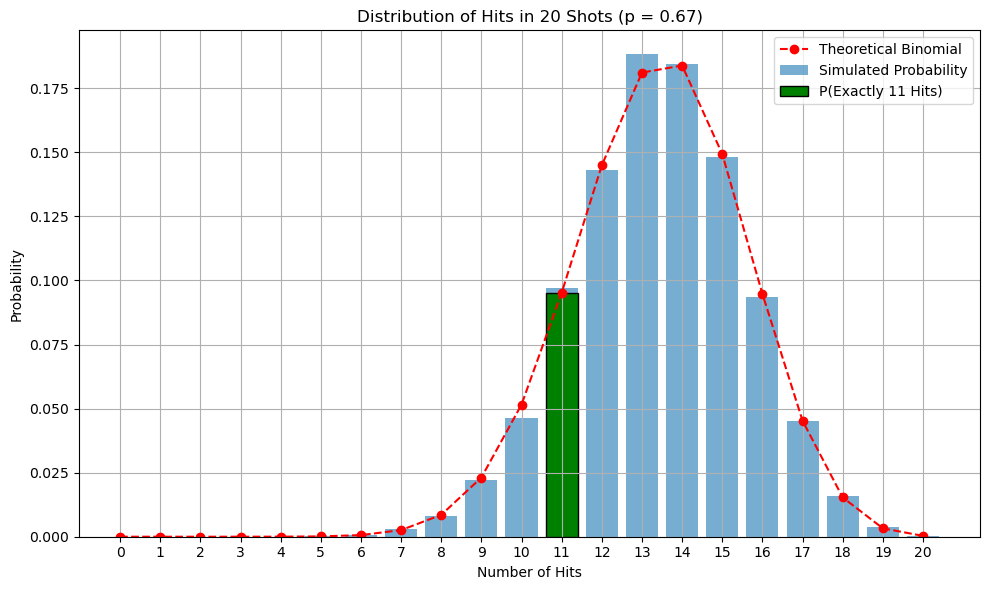

Probability of exactly 11 hits out of 20 shots: 0.0952


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters
n_shots = 20           # number of shots
p_hit = 0.67           # probability of hitting
num_trials = 10000     # number of simulations

# Run simulation
simulated_hits = np.random.binomial(n=n_shots, p=p_hit, size=num_trials)

# Count how often each number of hits occurred
values, counts = np.unique(simulated_hits, return_counts=True)

# Plot simulation results
plt.figure(figsize=(10, 6))
plt.bar(values, counts / num_trials, alpha=0.6, label='Simulated Probability')

# Add theoretical binomial distribution
x = np.arange(0, n_shots + 1)
theoretical_probs = binom.pmf(x, n_shots, p_hit)
plt.plot(x, theoretical_probs, 'r--', marker='o', label='Theoretical Binomial')

# Highlight the probability of exactly 11 hits
exact_11_prob = binom.pmf(11, n_shots, p_hit)
plt.bar(11, exact_11_prob, color='green', label='P(Exactly 11 Hits)', edgecolor='black')

# Labels and legend
plt.title(f'Distribution of Hits in {n_shots} Shots (p = {p_hit})')
plt.xlabel('Number of Hits')
plt.ylabel('Probability')
plt.xticks(range(0, n_shots + 1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the exact probability
print(f"Probability of exactly 11 hits out of 20 shots: {exact_11_prob:.4f}")


In [2]:
!pip install gymnasium[atari]


In [3]:
!pip install ale-py autorom[accept-rom-license]

In [4]:
import gymnasium as gym
import ale_py

# Register ALE environments
gym.register_envs(ale_py)

# Try creating your game again
env = gym.make("ALE/Breakout-v5", render_mode="rgb_array")


In [5]:
!pip install pygame

In [6]:
import pygame

In [7]:
pygame.init()
# Set up display, etc.

(5, 0)

In [8]:
# --- Control mapping for ALE actions ---
# 0 = NOOP, 1 = FIRE, 2 = RIGHT, 3 = LEFT, 4 = RIGHTFIRE, 5 = LEFTFIRE
ACTION_NOOP = 0
ACTION_FIRE = 1
ACTION_RIGHT = 2
ACTION_LEFT = 3
ACTION_RIGHTFIRE = 4
ACTION_LEFTFIRE = 5

In [9]:
import pygame

# Initialize pygame
pygame.init()

# Set up display
window = pygame.display.set_mode((200, 200))
pygame.display.set_caption("Space Invaders Controller")

# Define action constants
ACTION_NOOP = 0
ACTION_FIRE = 1
ACTION_RIGHT = 2
ACTION_LEFT = 3
ACTION_RIGHTFIRE = 4
ACTION_LEFTFIRE = 5

# Initialize counters
total_shots = 0
hits = 0
misses = 0

# Main game loop
running = True
while running:
    action = ACTION_NOOP

    # Get the state of all keys
    keys = pygame.key.get_pressed()

    # Determine action based on key combinations
    if keys[pygame.K_LEFT] and keys[pygame.K_SPACE]:
        action = ACTION_LEFTFIRE
    elif keys[pygame.K_RIGHT] and keys[pygame.K_SPACE]:
        action = ACTION_RIGHTFIRE
    elif keys[pygame.K_LEFT]:
        action = ACTION_LEFT
    elif keys[pygame.K_RIGHT]:
        action = ACTION_RIGHT
    elif keys[pygame.K_SPACE]:
        action = ACTION_FIRE
    else:
        action = ACTION_NOOP

    # Handle quit events
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN and event.key == pygame.K_ESCAPE:
            running = False

    # Your environment step code here...
    # observation, reward, terminated, truncated, info = env.step(action)
    # Update counters based on reward if needed
    # ...

# Don't forget to quit pygame after the loop
pygame.quit()

In [10]:
# --- Imports ---
import pygame
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, geom

# --- Initialize pygame ---
pygame.init()

# --- Screen settings ---
WIDTH, HEIGHT = 600, 800
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Mini Space Invaders")

# --- Colors ---
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
RED   = (255, 0, 0)
GREEN = (0, 255, 0)

# --- Player settings ---
player_width, player_height = 50, 30
player_x = WIDTH // 2 - player_width // 2
player_y = HEIGHT - player_height - 10
player_speed = 7

# --- Bullet settings ---
bullet_width, bullet_height = 5, 10
bullet_speed = 10

# --- Enemy settings ---
enemy_width, enemy_height = 50, 30
enemy_speed = 3
enemy_y = 50

# --- Game variables ---
bullets = []
enemy_x = random.randint(0, WIDTH - enemy_width)
total_shots = 0
hits = 0
misses = 0
running = True
clock = pygame.time.Clock()

# --- Main game loop ---
while running:
    clock.tick(60)
    screen.fill(BLACK)

    # --- Event handling ---
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        if event.type == pygame.KEYDOWN:
            if event.key == pygame.K_SPACE:
                bullets.append([player_x + player_width // 2 - bullet_width // 2, player_y])
                total_shots += 1

    # --- Player movement ---
    keys = pygame.key.get_pressed()
    if keys[pygame.K_LEFT] and player_x > 0:
        player_x -= player_speed
    if keys[pygame.K_RIGHT] and player_x < WIDTH - player_width:
        player_x += player_speed

    # --- Bullet movement ---
    for bullet in bullets[:]:
        bullet[1] -= bullet_speed
        if bullet[1] < 0:
            bullets.remove(bullet)
            misses += 1
        # Check collision with enemy
        if (enemy_x < bullet[0] < enemy_x + enemy_width) and (enemy_y < bullet[1] < enemy_y + enemy_height):
            hits += 1
            bullets.remove(bullet)
            enemy_x = random.randint(0, WIDTH - enemy_width)  # respawn enemy

    # --- Enemy drawing ---
    pygame.draw.rect(screen, RED, (enemy_x, enemy_y, enemy_width, enemy_height))

    # --- Player drawing ---
    pygame.draw.rect(screen, GREEN, (player_x, player_y, player_width, player_height))

    # --- Bullet drawing ---
    for bullet in bullets:
        pygame.draw.rect(screen, WHITE, (bullet[0], bullet[1], bullet_width, bullet_height))

    # --- Display updates ---
    pygame.display.flip()

# --- Quit pygame ---
pygame.quit()

# --- Display game summary ---
print("\n🎮 --- Game Summary ---")
print(f"Total Shots Fired: {total_shots}")
print(f"Hits: {hits}")
print(f"Misses: {misses}")

# --- Analysis (your existing binomial & geometric code goes here) ---
if total_shots > 0:
    # Binomial analysis
    n_shots = total_shots
    p_hit_est = hits / total_shots
    expected_hits = n_shots * p_hit_est
    variance_hits = n_shots * p_hit_est * (1 - p_hit_est)
    k_target = int(round(expected_hits))
    prob_exact_k = binom.pmf(k_target, n_shots, p_hit_est)

    print(f"Estimated hit probability: {p_hit_est:.3f}")
    print(f"Expected hits: {expected_hits:.2f}, Variance: {variance_hits:.2f}")
    print(f"Probability of exactly {k_target} hits: {prob_exact_k:.4f}")



🎮 --- Game Summary ---
Total Shots Fired: 21
Hits: 3
Misses: 18
Estimated hit probability: 0.143
Expected hits: 3.00, Variance: 2.57
Probability of exactly 3 hits: 0.2418


In [ ]:
So there’s roughly a 9.9% chance the player hits the UFO exactly 11 times out of 20 shots when the hit rate is 67%.